# IDS Assignment Part 2 - <font color="red"><h7>Deadline: 23/01/2023 23:59</h7></font>
This is the second part of the assignment in IDS 2022/2023. 
Please use this Jupyter notebook to work on the questions posed in the assignment. When you are done, upload the notebook in Moodle at the designated activity. In addition to the _Jupyter notebook_, please submit _one zip-file_ containing your screenshots for Question 7. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work. Also, do not attempt to upload your assignment at the last minute before the deadline. This often does not work, and you will miss the deadline. Late submissions will not be considered.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

<font color="red"><b>Student Names and IDs:
    
    1. 
    
    2. 
    
    3.

## Question 1: Preprocessing (20 points)

In [1]:
import pandas as pd

### Sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer

In this question, we consider a dataset documenting the Ski Resorts in Europe (**ski_resorts.csv**).
Each row contains some information about the Ski resort.
You can find a short description for each column:

| Column | Description |
| ------ | ----------- |
| Resort | The name of the ski & snowboard resort. |
| Country | The country in which the resort is located. |
| HighestPoint | The highest mountain point at the ski resort.   |
| LowestPoint | The lowest possible point to ski at the ski resort.  |
| DayPassPriceAdult | The price shows what it costs for 1 adult for 1 day in the main season in Euro. |
| BeginnerSlope | The total amount of “beginner” slopes in kilometer at the resort. “Beginner slopes” contains “children”, “blue” and, “green” slopes. |
| IntermediateSlope | The total amount of “intermediate” slopes in kilometer at the resort. “Intermediate slopes” contains “red” slopes. |
| DifficultSlope | The total amount of “difficult” slopes in kilometer at the resort. “Difficult slopes” contains “black”, “advanced”, and ”expert” slopes. |
| TotalSlope | The sum of “beginner slopes” + “intermediate slopes” + “difficult slopes” |
| Snowparks | Does the resort have one or more snowparks, or not? |
| NightSki | Does the resort offer skiing on illuminated slopes? |
| SurfaceLifts | The amount of lifts in this category: T-bar, Sunkidslift, Rope lifts, and people mower. |
| ChairLifts | The total amount of chairlifts. |
| GondolaLifts | The amount of lifts in this category: Gondola, Train lifts, Funicular, Combined gondola and chairlifts, Helicopter lifts, Snowcats, and Aerial tramways. |
| TotalLifts | The sum of “surface lifts etc” + “gondola etc” + “chairlifts etc.” |
| LiftCapacity | How many passengers can the lift system at the ski resort mowe in one hour? |
| SnowCannons  |The total amount of snow cannons at the ski resort.|

### a) Loading the Data and Initial Quality Investigation (2.5pts)

#### **a(i)** 
Load the dataset into a dataframe `df`. <font color='red'>Use the first column as index for your dataframe</font>. Ensure that the index is valid, that is, it should not contain any duplicate entries. 



**In the subsequent questions, only modify the dataframe `df` if explicitly requested. However, you can always create working copies.**

In [2]:
df = pd.read_csv('datasets/ski_resorts.csv')
df.set_index(df.columns[0], inplace=True, verify_integrity=True)

#### **a(ii)** 
Show the data types of the dataframe columns as well as the first 5 rows. On the first sight, are there any data type problems (e.g., numerical columns having a non-numerical data type)?



In [3]:
print(df.dtypes)
df.head(5)

Resort                object
Country               object
HighestPoint         float64
LowestPoint          float64
DayPassPriceAdult    float64
BeginnerSlope        float64
IntermediateSlope      int64
DifficultSlope       float64
TotalSlope             int64
Snowparks             object
NightSki              object
SurfaceLifts         float64
ChairLifts             int64
GondolaLifts         float64
TotalLifts             int64
LiftCapacity         float64
SnowCannons          float64
dtype: object


,Resort,Country,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
Unnamed: 0,,,,,,,,,,,,,,,,,
1,Alpendorf (Ski amedé),Austria,1980.0,740.0,52.0,30.0,81,4.0,115,Yes,No,22.0,16,11.0,49,75398.0,600.0
2,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,Andorra,2640.0,1710.0,47.0,100.0,77,33.0,210,Yes,Yes,37.0,28,7.0,72,99017.0,1032.0
3,Oberau (Wildschönau),Austria,1130.0,900.0,30.0,1.0,0,1.0,2,No,No,2.0,0,0.0,2,1932.0,0.0
4,Dachstein West,Austria,1620.0,780.0,42.0,15.0,33,3.0,51,Yes,Yes,25.0,8,3.0,36,32938.0,163.0
5,Rosa Khutor,Southern Russia,2320.0,940.0,22.0,30.0,26,21.0,77,Yes,No,6.0,11,10.0,27,49228.0,450.0


**Your Answer:**
- `Resort` and `Country` should be `categorical`
- `IntermediateSlope` and `TotalSlope` should be `float64`
- `Snowparks` and `NightSky` should be `bool`
- `SurfaceLifts`, `Chairlifts` and `GondolaLifts` should be `int64`
- `SnowCannons` should be `int64`

#### **a(iii)** 
To improve performance and memory usage (in particular for large datasets) it is important to use **categorical** columns whenever suitable.
Are there any categorical column candidates? Explain your answer. \
Afterward, convert the column(s) in `df` into categorical column(s).

In [4]:
df['Resort'] = df['Resort'].astype('category')
df['Country'] = df['Country'].astype('category')

**Your Answer:** There are two columns suitable for categorical datatypes: `Resort` and `Country`. They are currently `strings` with the datatype `object` and since there is a fixed set of possible values for each column they are ideal candidates for a categorical datatype.

### b) Handling Missing Values & Encoding (17.5pts)

In the following task, you can assume that every NAN entry in the dataframe is actually a missing value. This can partially be justified by the fact that pandas did not have problems inferring the "proper" datatypes (e.g., a string indicating a missing number in a number column would result in pandas parsing an object column) and your subsequent check of the data types. Therefore, you can use `df.isna()` as a proxy indicator for missing values.

#### **b(i)** 
Simply discarding missing entries is usually not a good idea. Therefore, you should first analyze the number of missing values and check for patterns of missing values. 

To this end, compute the following statistics on missing values:
1. How many entries does the dataframe have? (To relate this to the number of entries missing)
2. How many missing values do we have? What is the ratio i.e., "number of missing values"/"number of entries of df"?
3. How many rows have at least a single missing value?
4. Count the number of missing values per column.
5. Count the number of missing values per row and aggregate them - i.e., show the number of rows that suffer from x missing values.
6. What do you observe? Are there any rows containing missing values for the same set of columns? Can you identify potential patterns?


In [5]:
# 1. How many entries does the dataframe have? (To relate this to the number of entries missing)
entries = df.size
print(f"There are {entries} entries.")

There are 6392 entries.


In [6]:
# 2. How many missing values do we have? What is the ratio i.e., "number of missing values"/"number of entries of df"?
missing_values = df.isna().sum().sum()
print(f"There are {missing_values} missing values.")
missing_values_ratio = missing_values / entries
print(f"The ratio of missing values is {missing_values_ratio}")

There are 87 missing values.
The ratio of missing values is 0.013610763454317897


In [7]:
# 3. How many rows have at least a single missing value?
rows_missing_values = df.isna().any(axis=1).sum()
print(f"There are {rows_missing_values} rows with missing values")

There are 45 rows with missing values


In [8]:
# 4. Count the number of missing values per column.
cols_missing_values = df.isna().sum()
print(cols_missing_values)

Resort                0
Country               0
HighestPoint         13
LowestPoint           3
DayPassPriceAdult    17
BeginnerSlope         8
IntermediateSlope     0
DifficultSlope        8
TotalSlope            0
Snowparks             0
NightSki              0
SurfaceLifts          6
ChairLifts            0
GondolaLifts          7
TotalLifts            0
LiftCapacity         17
SnowCannons           8
dtype: int64


In [9]:
# 5. Count the number of missing values per row and aggregate them - i.e., show the number of rows that suffer from x missing values.
rows_with_missing_values = df.isna().sum(axis=1).value_counts()
print(rows_with_missing_values)

0    331
1     35
6      8
2      2
dtype: int64


In [10]:
# 6.
aggregated = df.isna().value_counts()
print(aggregated.index.names)
for i in aggregated.items():
    print(i)

['Resort', 'Country', 'HighestPoint', 'LowestPoint', 'DayPassPriceAdult', 'BeginnerSlope', 'IntermediateSlope', 'DifficultSlope', 'TotalSlope', 'Snowparks', 'NightSki', 'SurfaceLifts', 'ChairLifts', 'GondolaLifts', 'TotalLifts', 'LiftCapacity', 'SnowCannons']
((False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), 331)
((False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False), 8)
((False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), 8)
((False, False, True, False, True, True, False, True, False, False, False, False, False, False, False, True, True), 8)
((False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False), 7)
((False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False), 5

**Your answer:** *(for 6. What do you observe? Are there any rows containing missing values for the same set of columns?)*

As we can see there are three most common cases of missing values in a row: There are 8 cases where only the LiftCapacity is missing and other 8 cases where the DayPassPriceAdult is missing. Finally there are 8 cases where the HighesPoint, the DayPassPriceAdult, the BeginnerSlope, the DifficultSlope, the LiftCapacity and the SnowCannons are missing.

#### **b(ii)**
For the next step:

1. Transform the categorical column(s) you identified in a(iii) into one-hot encoding format. 
2. Transform the columns "Snowparks" and "NightSki" in `df` into boolean data type, where "Yes" should be `True` and "No" should be `False`

In the end, the original categorical column(s) should still be there. Additionally, there should be x number (x is the number of unique values) of one-hot encoding columns for each categorical column. Use the following naming convention for the new columns "{name of the categorical column}_{unique value for that column}" Also, make sure the columns "Snowparks" and "NightSki" are boolean type in the end.
Lastly, print the top five rows of the resulting dataframe.

*Hint: You can use the pd.get_dummies() function from pandas for the first transformation*

In [11]:
# 1. Transform the categorical column(s) you identified in a(iii) into one-hot encoding format. 
categorical_cols=['Resort', 'Country']
df_dummies = pd.get_dummies(df[categorical_cols])
df = pd.concat([df, df_dummies], axis=1)

In [12]:
# 2. Transform the columns "Snowparks" and "NightSki" in `df` into boolean data type, where "Yes" should be `True` and "No" should be `False`
df['Snowparks'] = df['Snowparks'].map({'Yes': True, 'No': False}).astype('boolean')
df['NightSki'] = df['NightSki'].map({'Yes': True, 'No': False}).astype('boolean')

In [13]:
# use df.dtypes to check if you correctly transform the data
print(df[['Resort', 'Country', 'Snowparks', 'NightSki']].dtypes)
df.head(5)

Resort       category
Country      category
Snowparks     boolean
NightSki      boolean
dtype: object


,Resort,Country,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,...,Country_Serbia,Country_Siberia,Country_Slovakia,Country_Slovenia,Country_Southern Russia,Country_Spain,Country_Sweden,Country_Switzerland,Country_Ukraine,Country_United Kingdom
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,Alpendorf (Ski amedé),Austria,1980.0,740.0,52.0,30.0,81,4.0,115,True,...,0,0,0,0,0,0,0,0,0,0
2,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,Andorra,2640.0,1710.0,47.0,100.0,77,33.0,210,True,...,0,0,0,0,0,0,0,0,0,0
3,Oberau (Wildschönau),Austria,1130.0,900.0,30.0,1.0,0,1.0,2,False,...,0,0,0,0,0,0,0,0,0,0
4,Dachstein West,Austria,1620.0,780.0,42.0,15.0,33,3.0,51,True,...,0,0,0,0,0,0,0,0,0,0
5,Rosa Khutor,Southern Russia,2320.0,940.0,22.0,30.0,26,21.0,77,True,...,0,0,0,0,1,0,0,0,0,0


#### **b(iii)** 
The previous analysis in b(i) showed that there are missing values in the 'SurfaceLifts' and 'GondolaLifts' columns.\
How would you impute these values? \
Motivate your approach and apply it to `df`.

*Hint: Remember the semantics of the columns. Also, carefully assert your assumptions.*


**Your Answer:** *(Motivate your approach.)*

Since we are working with numerical data we can replace the missing values with the mean value of the columns. There are more powerful tools like clustering, decision trees or regression that most likely would produce better results, but we are going for a more cost-effective approach.

In [14]:
# surface_lifts_mean = df['SurfaceLifts'].mean()
# gondola_lifts_mean = df['GondolaLifts'].mean()

df['SurfaceLifts'] = df['SurfaceLifts'].fillna(0).astype('int64')
df['GondolaLifts'] = df['GondolaLifts'].fillna(0).astype('int64')

#### **b(iv)**
Impute the rest of the missing values using the knn-imputation method. To this end, apply the following steps:
1. Create a working copy `df_tmp` of your updated `df`.
2. For simplicity, drop the non-numerical columns (i.e., not of types integer or floats), which also inlcude the one-hot encoded and the boolean columns* you created earlier.
3. Normalize the data in `df_tmp` (e.g., Standard score normalization). If the features have very different scales, knn can become very biased.
4. Impute the missing values considering six neighbors.
5. Invert the transformation applied upfront to enable more meaningful and intuitive visualizations.
6. Append the columns you dropped in step 2.
 
In the end, `df` should not contain missing values and have all the columns.

\*Note that by dropping the columns we lose the information of countries and the two boolean attributes ("Snowparks" and "NightSki") when imputing the missing values, which might be crucial for inferencing values such as the price for a ski pass. In practice, one should try to find if there are correlations before deciding whether to drop the columns or not.
We drop the columns here to make the following steps easier because we only have to deal with numerical columns.

*Hint: Be careful with the indices of your dataframes.*


In [15]:
# step 1 & 2
df_tmp = df.copy()
df_tmp = df_tmp.select_dtypes(include=['int64', 'float64'])

In [16]:
# step 3
sc = StandardScaler()
df_temp = pd.DataFrame(sc.fit_transform(df_tmp), columns=df_tmp.columns, index=df_tmp.index)

In [17]:
# step 4
knn = KNNImputer(n_neighbors=6)
df_tmp = pd.DataFrame(knn.fit_transform(df_tmp), columns=df_tmp.columns, index=df_tmp.index)

In [18]:
# step 5
df_tmp = pd.DataFrame(sc.inverse_transform(df_tmp), columns=df_tmp.columns, index=df_tmp.index)

In [19]:
# step 6
df_tmp2 = df.copy()
df_tmp2 = df_tmp2.select_dtypes(exclude=['int64', 'float64'])
df_tmp = pd.concat([df_tmp, df_tmp2], axis=1)

In [20]:
df = df_tmp
assert df.isna().sum().sum() == 0

## Question 2: Visualization (13 points)

In this task, you will analyze the data using different means of visualization.

Start with the following preprocessed and integrated dataframe `df_v`. \
Note that it has a similar structure to the dataframe that you should obtain from the previous task, however, the values have been modified.

In [21]:
import pandas as pd
import plotly.express as px
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df_v = pd.read_csv("./datasets/ski_resorts_visual.csv", index_col=0)

### **a) (3pts)** 
To start the visual analysis, make a Scatter plot matrix to visually check if there are any correlations between the numerical attributes.

*Hint: You can use the scatter_matrix from pandas.plotting or pairplot from seaborn to make the plot.*


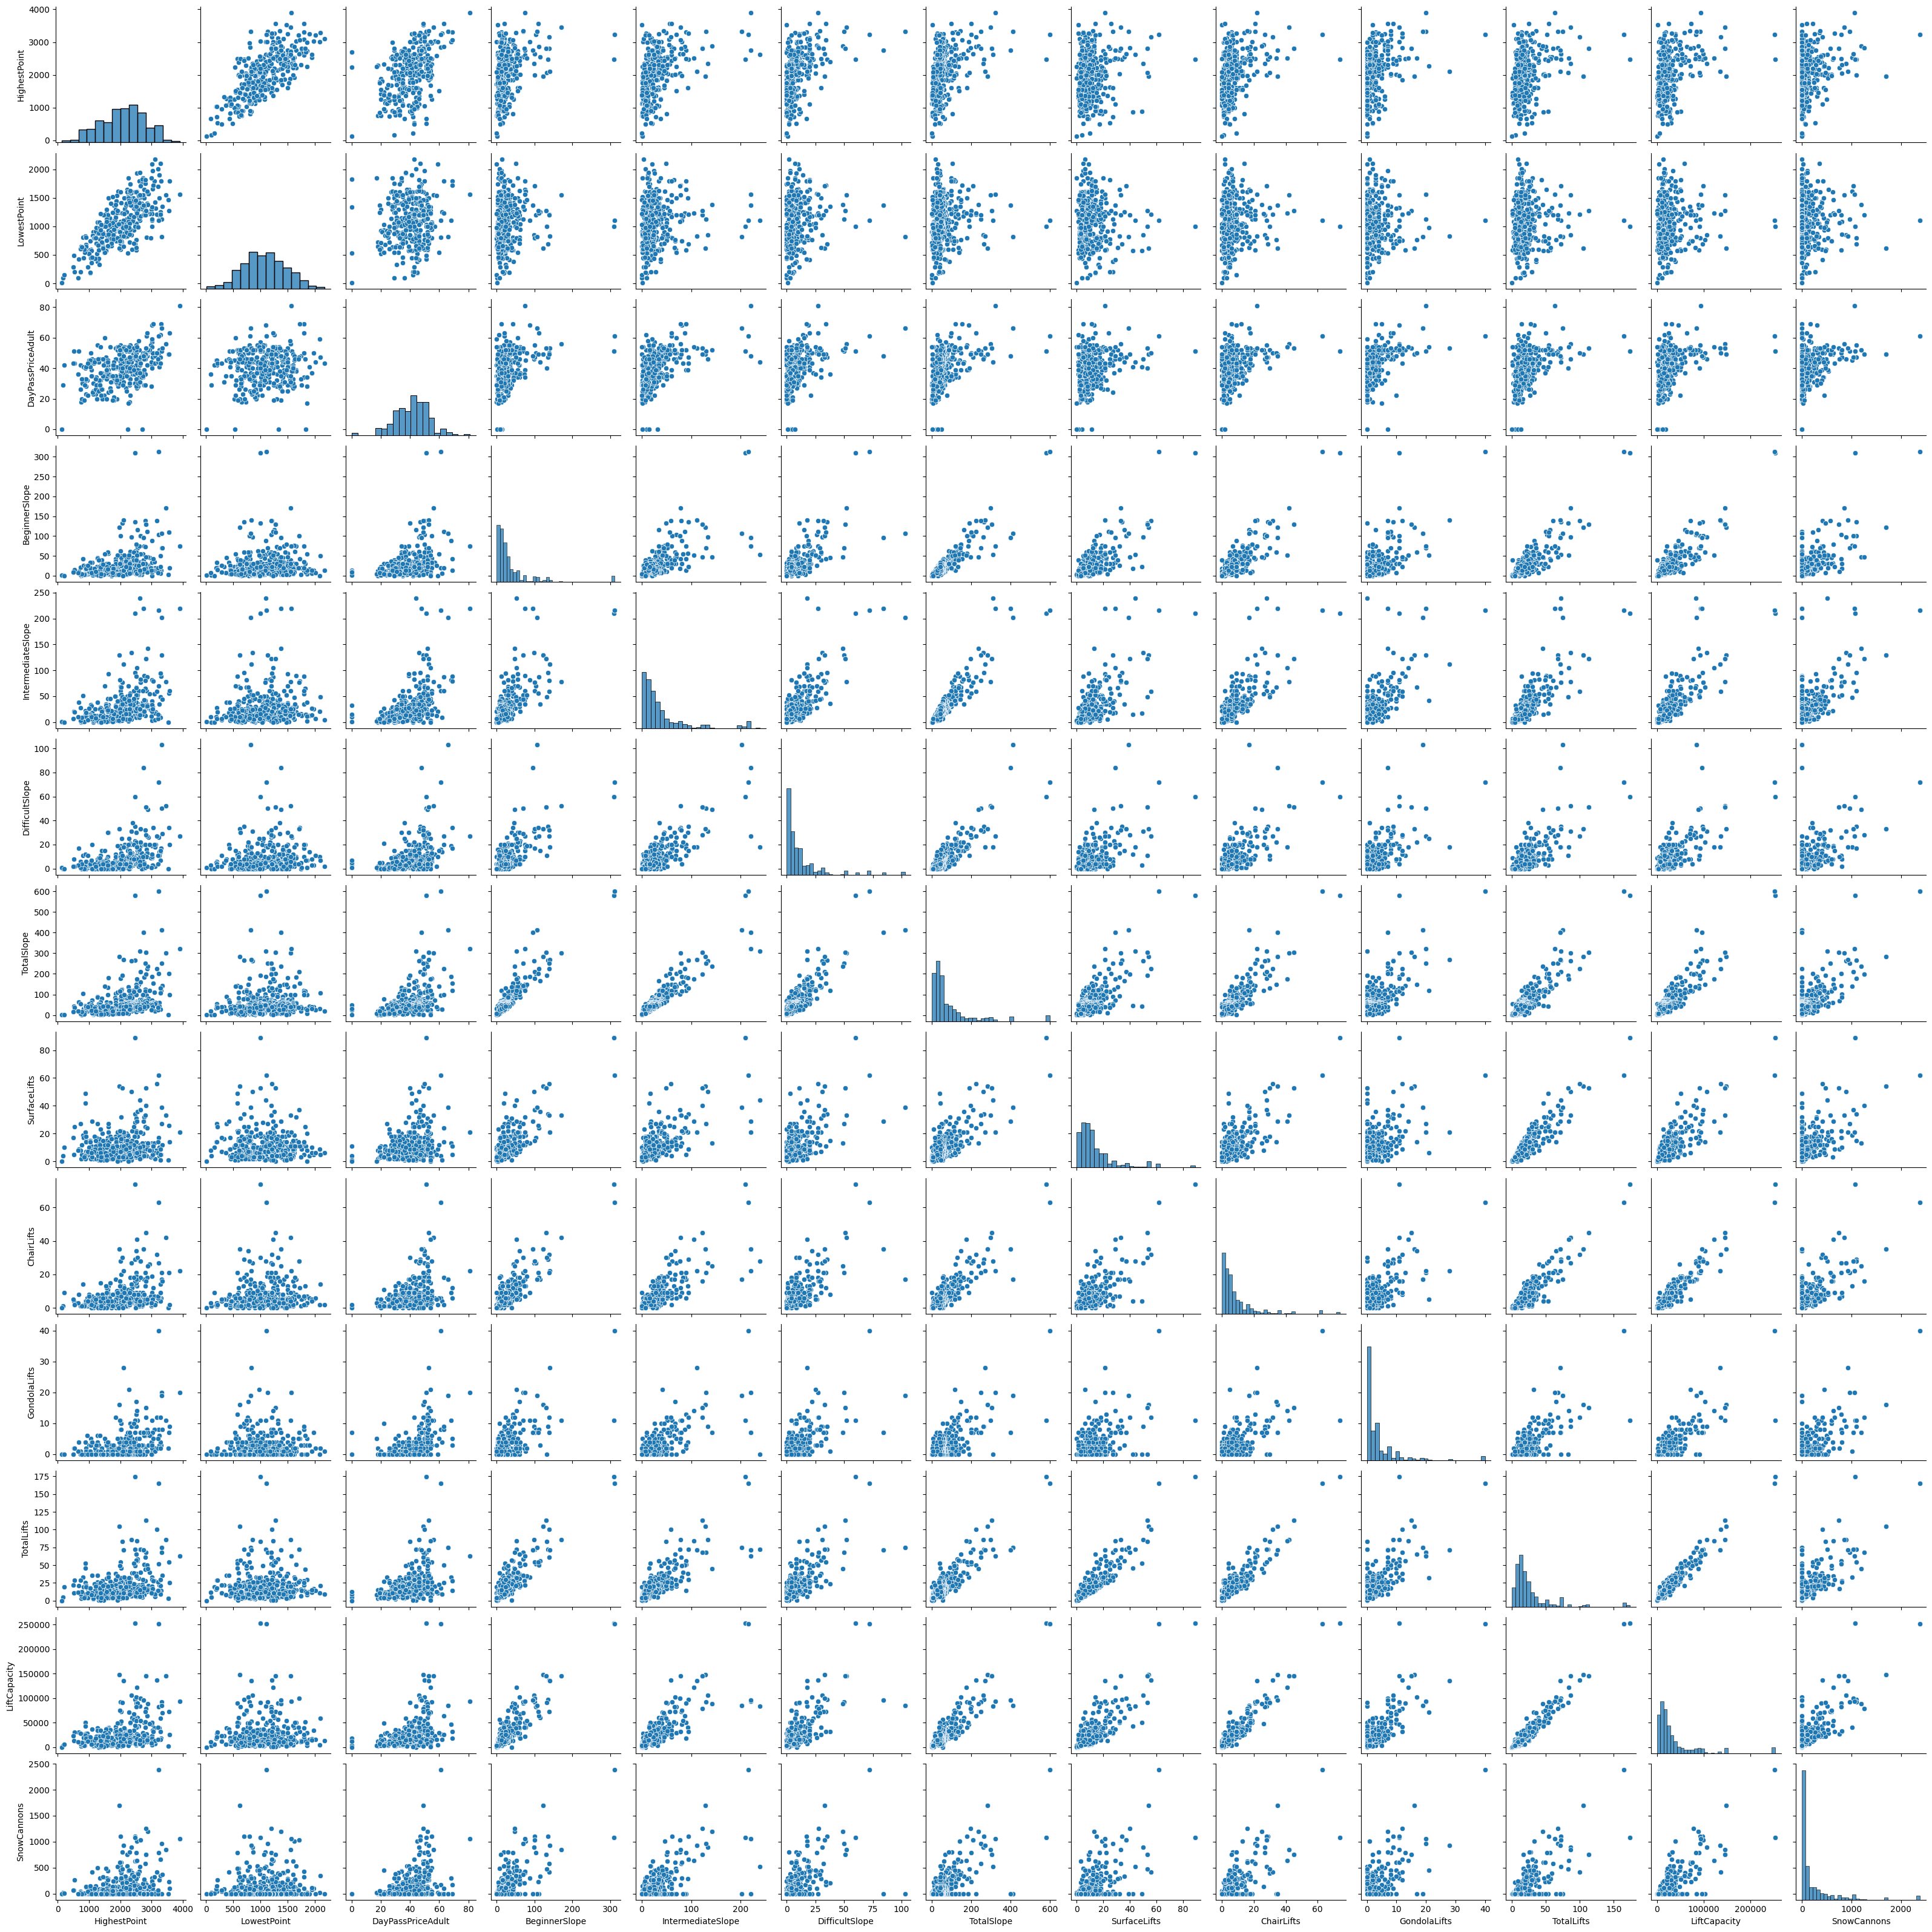

In [23]:
sns.pairplot(df_v.select_dtypes(include=['int64', 'float64']))

### **b) (3pts)**
Another way to detect correlation is to calculate the Pearson correlation coefficient. Calculate the correlation matrix for the numerical data and visualize the matrix using a heatmap. 
Briefly discuss your findings from the heatmap and the scatter plot you created in 2(a).

Make sure to annotate the heatmap with the values of the correlation.

*Hint: You can use the heatmap function from seaborn to make the plot.*

<AxesSubplot: >

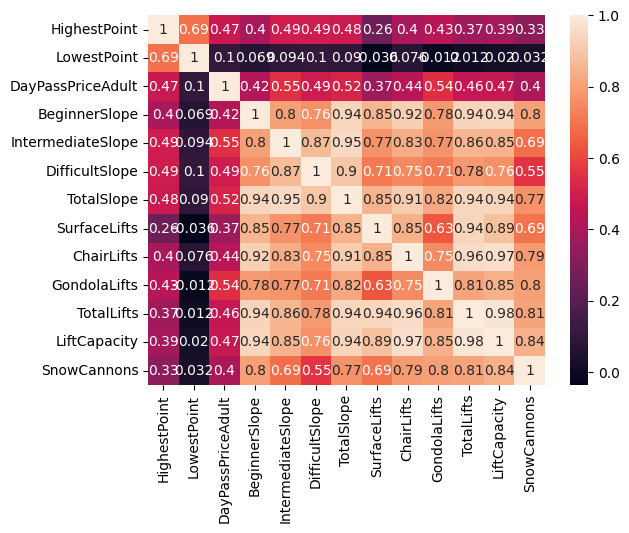

In [24]:
sns.heatmap(df_v.select_dtypes(include=['int64', 'float64']).corr(), annot=True)

# TODO! Disuss findings

### **c) (4pts)** 
We now want to have an overview of the attribute "TotalSlope" aggregated by different levels of hierarchy (Europe -> Country -> Resort). It seems that a tree map is suitable for this purpose.

Make a tree map where
- the root node represents Europe.
- the child nodes of Europe are countries.
- the child nodes of each country are the ski resorts.
- the size of the rectangles is determined by the attribute "TotalSlope".

Also, use the tree map to find out
1. The sum of TotalSlopes of a country, list the top five countries and the corresponding values.
2. The max value of TotalSlope of the five countries you identified in 1.

*Hint: You can use the treemap function from plotly.express.*

In [25]:
px.treemap(df_v, path=['Country', 'Resort'], values='TotalSlope')

1. France: Sum: 12546 & Max: 600
2. Austria: Sum: 7005 & Max: 304
3. Switzerland: Sum: 5710 & Max: 412
4. Italy: Sum: 3742 & Max: 400
5. Andorra: Sum: 723 & Max: 210


### **d) (3pts)** 

An alternative to a tree map is a sunburst plot, the principle is similar to a tree map. 

Recall from the lecture that:
- Each ring is a different level of the hierarchy
- Each segment of a ring belongs to one categorical value
- The size of a segment is either divided proportionally to a value

Now, we would like to have an overview of the attribute "TotalLifts" aggregated by different level of hierarchy.

Make a sunburst plot where
- the first hierarchy(ring) is "Country"
- the second hierarchy(ring) is "Snowparks" (whether the resort has snowparks)
- the third hierarchy(ring) is "Resort"
- the size of the segments is determined by the attribute "TotalLifts".

Then, briefly discuss your findings from the plot.

*Hint: You can use the sunburst function from plotly.express.*

In [26]:
px.sunburst(df_v, path=['Country', 'Snowparks', 'Resort'], values='TotalLifts')

**Your answer:**
We can see that in most countries the majority of ski resorts have a now park.

## Question 3 - Frequent Item Sets and Association Rules (15 points)

In [27]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules as arule

### A real online retail transaction data set of two years.

Data Set Information:
This Retail dataset contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift ware. Many customers of the company are wholesalers.

Attribute Information:
- Invoice: Invoice number. Nominal. A 6-digit integral number is uniquely assigned to each transaction. If the number starts with 'C' it refers to a canceled transaction.
- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invoice date and time. Numeric. The day and time when a transaction was generated.
- Price: Unit price. Numeric. Product price per unit in sterling (£).
- CustomerID: Customer number. Nominal. A 5-digit integral number is uniquely assigned to each customer. This number has postfix 'n'.
- Country: Country name. Nominal. The name of the country where a customer resides.

### a) Loading, exploring and preprocessing the dataset (4 pts)

#### **a(i)** 
Load the data from `retail.csv` and save it under the variable `retail_df`. Display the first few lines of the dataframe.

In [28]:
retail_df = pd.read_csv('datasets/retail.csv')
retail_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,178500,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,178500,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,178500,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,178500,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,178500,United Kingdom


#### **a(ii)** 
To get to know the dataset, do the following:

- Show the number of rows in the dataset.
- Show the number of unique customers.
- Show the number of unique product names.
- Show the number of unique invoices.
- Show the number and the list of all the countries where the customers reside.

In [29]:
def print_info(retail_df):
    print(f"There are {retail_df.shape[0]} rows")
    print(f"There are {retail_df['CustomerID'].nunique()} unique customers")
    print(f"There are {retail_df['Description'].nunique()} unique product names")
    print(f"There are {retail_df['Invoice'].nunique()} unique invoices")
    print(f"There are {retail_df['Country'].nunique()} countries where the customers reside:")
    print(retail_df['Country'].unique())

print_info(retail_df)

There are 406525 rows
There are 4367 unique customers
There are 3896 unique product names
There are 22177 unique invoices
There are 35 countries where the customers reside:
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Saudi Arabia' 'Czech Republic' 'Canada' 'Brazil'
 'USA' 'Bahrain' 'Malta' 'RSA']


#### **a(iii)** 
You are interested in analyzing itemsets that are frequently purchased together. Before continuing with that task, you have to make sure that the data are fit for such analysis. 1) More precisely, you want to make sure that there are no missing values in the data. 2) Moreover, you want to ensure that each item's name in the "Description" is consistent. E.g., you want "Description" values such as " coffee black", "coffee &nbsp;black", " coffee black &nbsp;", etc. to be mapped to the same value (e.g. "coffee black"). 3) Last but not least, you want to remove transactions that were canceled. Such transactions correspond to rows where the invoice number starts with letter 'C'.

Apply these preprocessing steps to the dataset `retail_df` and apply them on the dataframe itself (e.g. set inplace=True).

In [30]:
# 1) No missing values:
if retail_df.isna().sum().sum() != 0:
    raise Exception("There are missing values in the dataset that have to be corrected.")

# 2) Standardize Description: Remove all whitespaces and replaces them with a single space between words:
retail_df['Description'] = retail_df['Description'].apply(lambda des: " ".join(des.split()))

# 3) Remove rows with Invoice number starting with letter 'C':
retail_df.drop(retail_df[retail_df['Invoice'].apply(lambda i: i[0]) == 'C'].index, inplace=True)

#### **a(iv)** 
After applying the preprocessing steps in **a(iii)** , repeat again the task **a(ii)**, that is:

- Show the number of rows in the dataset.
- Show the number of unique customers.
- Show the number of all unique product names.
- Show the list of all the countries where the customers reside.

Which values changed?

In [31]:
print_info(retail_df)

There are 397621 rows
There are 4334 unique customers
There are 3858 unique product names
There are 18524 unique invoices
There are 35 countries where the customers reside:
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Israel' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Brazil' 'USA' 'Bahrain' 'Malta' 'RSA']


**Your answer:** The number of rows has changed because we dropped the canceled transactions. The number of unique customers has also dropped. This implies that there has been some customers that have canceled all their transactions. The number of unique product names has also dropped. This may be because all transactions of a specific product have been canceled or, more likely, this is only due to the standardization of the descriptions. The number of unique invoices has also dropped for the same reasons previously mentioned.

### b) Frequent itemsets and Association rules (8 pts)

#### **b(i)** 
Each invoice number in the dataset identifies a unique transaction. There are potentially many rows in the dataframe having the same invoice number. We want to analyze items that are frequently purchased together, that is, items that appear in the same transaction.

Create a new dataframe named `transaction_df` with two columns: "Invoice" and "Description". Here the "Invoice" value is the index of the dataframe (the unique number identifying each row) and "Description" is the column containing all items (without duplicates) purchased within the transaction with that invoice number. Display the first few rows of your dataframe. How many rows does the `transaction_df` have?

In [32]:
transaction_df = retail_df.groupby('Invoice').agg({'Description': lambda des: des.unique()})
print(f"transaction_df has {transaction_df.shape[0]} rows.")
transaction_df.head()


transaction_df has 18524 rows.


,Description
Invoice,
536365,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET..."
536366,"[HAND WARMER UNION JACK, HAND WARMER RED POLKA..."
536367,"[ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO..."
536368,"[JAM MAKING SET WITH JARS, RED COAT RACK PARIS..."
536369,[BATH BUILDING BLOCK WORD]


**Your answer:** The new DataFrame has 18524 rows. Which is expected because we saw earlier that here are 18524 unique invoices.

#### **b(ii)** 
Next, we want to compute frequent itemsets and association rules based on the sets of items ordered together. Use the TransactionEncoder to transform `transaction_df` into a matrix such that the value in the i-th row and the j-th column is $True$ if the i-th itemset contains product j, and $False$ otherwise. Save the matrix into a dataframe named `transactions`. Display the shape of the matrix.

*Hint: Note that your dataframe 'transactions' must contain as many rows as there are invoice numbers and as many columns as there are unique products.*

In [33]:
encoder = TransactionEncoder()
transactions = pd.DataFrame(encoder.fit_transform(list(transaction_df['Description'])), index=transaction_df.index, columns=encoder.columns_)
transactions.shape

(18524, 3858)

#### **b(iii)** 
Use the apriori method on `transactions` to obtain all frequent itemsets using min_support=0.01. Display all frequent itemsets that have at least three items. What support count does an itemset have for our case if it satisfies min_support=0.01?

In [34]:
fi = apriori(transactions, min_support=0.01, use_colnames=True)
fi[fi['itemsets'].apply(lambda itemset: len(itemset) >= 3)]

,support,itemsets
923,0.011607,"(ALARM CLOCK BAKELIKE RED, ALARM CLOCK BAKELIK..."
924,0.014414,"(ALARM CLOCK BAKELIKE RED, ALARM CLOCK BAKELIK..."
925,0.014630,"(PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES..."
926,0.021054,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY..."
927,0.016843,"(ROSES REGENCY TEACUP AND SAUCER, REGENCY CAKE..."
928,0.012524,"(JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS..."
929,0.010149,"(JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS..."
930,0.011876,"(JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS..."
931,0.010095,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ..."
932,0.010095,"(JUMBO BAG RED RETROSPOT, LUNCH BAG PINK POLKA..."


**Your answer:** Since the support is just the support count divided by the size of the dataset we can multiply the min_support by the size, round to the next integer. That is the minimum support count an itemset has to have to pass the min_support: $\lceil 0.01 \times 18524 \rceil = 186$

#### **b(iv)**
Now we will discover association rules from the frequent itemsets. Using only the frequent itemsets with min_support=0.01 (the ones obtained in **b(iii)**), generate different association rules using min_conf=0.6 and min_conf=0.9 as thresholds. Show the association rules for each of the thresholds. What do you notice w.r.t. the number of association rules produced for the different thresholds?

In [35]:
rules_0_6 = arule(fi, min_threshold=0.6)
rules_0_9 = arule(fi, min_threshold=0.9)
display(rules_0_6)
display(rules_0_9)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE GREEN),0.017383,0.042593,0.011337,0.652174,15.311622,0.010596,2.752544
1,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED),0.017383,0.047290,0.012200,0.701863,14.841686,0.011378,3.195548
2,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE GREEN),0.019380,0.042593,0.011876,0.612813,14.387522,0.011051,2.472726
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.047290,0.042593,0.028612,0.605023,14.204617,0.026597,2.423954
4,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.042593,0.047290,0.028612,0.671736,14.204617,0.026597,2.902271
...,...,...,...,...,...,...,...,...,...
145,"(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU...","(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.020190,0.023537,0.012902,0.639037,27.150297,0.012427,2.705164
146,"(LUNCH BAG BLACK SKULL., LUNCH BAG PINK POLKAD...",(LUNCH BAG RED RETROSPOT),0.014036,0.069531,0.010419,0.742308,10.675860,0.009443,3.610774
147,"(LUNCH BAG BLACK SKULL., LUNCH BAG PINK POLKAD...",(LUNCH BAG CARS BLUE),0.016627,0.052149,0.010419,0.626623,12.016119,0.009552,2.538593
148,"(LUNCH BAG BLACK SKULL., LUNCH BAG CARS BLUE, ...",(LUNCH BAG PINK POLKADOT),0.014144,0.050259,0.010419,0.736641,14.656866,0.009708,3.606262


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(REGENCY TEA PLATE PINK),(REGENCY TEA PLATE GREEN),0.012092,0.014576,0.010905,0.901786,61.869180,0.010729,10.033411
1,"(POPPY'S PLAYHOUSE LIVINGROOM, POPPY'S PLAYHOU...",(POPPY'S PLAYHOUSE KITCHEN),0.011067,0.018678,0.010041,0.907317,48.575553,0.009834,10.587943
2,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.014306,0.037303,0.012902,0.901887,24.177353,0.012369,9.812104


**Your answer:** With a threshold of 0.9 we only get 3 rules, but with one of 0.6 we get 150.

#### **b(v)** 
From the association rules that satisfy the confidence threshold 0.6, select and show the two rules with the highest lift. What do you notice if you compare the two rules with each other?

In [36]:
rules_0_6.sort_values('lift', ascending=False).head(2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
54,(REGENCY TEA PLATE GREEN),(REGENCY TEA PLATE PINK),0.014576,0.012092,0.010905,0.748148,61.86918,0.010729,3.922574
53,(REGENCY TEA PLATE PINK),(REGENCY TEA PLATE GREEN),0.012092,0.014576,0.010905,0.901786,61.86918,0.010729,10.033411


**Your answer:** The two rules are very similar. They both have the same antecedents and their consequents only differ by one element (GREEN // PINK). Their support, lift and leverage is the same.

#### **b(vi)** 

In the analysis tasks in **b)**, an itemset consisted of items that had the same invoice number (same transaction items). Thus, if an itemset was frequent, it meant that the items in it were frequently purchased together.
An association rule $A \Rightarrow B$ meant that if items in $A$ are purchased, then the items in $B$ are also purchased in that same transaction.

Suppose that we would repeat the analysis, but this time, the itemsets would consist of items having the same "CustomerID" (bought from the same customer). Interpret the meaning of the frequent itemsets and association rules for this kind of itemsets.

**Your answer:** In this case, if an itemset was frequent, it means that the items in it are often purchased by the same people. An association rule $A \Rightarrow B$ means that if items $A$ are purchased by a customer, the the items in $B$ are also purchased by the same person. This could be used to generate suggestions for customers who have already bought items in the past and are currently picking items for their next purchase.

### c) Sequence Mining (3 pts)

For this task, the dataset used is `retail_sequences.csv`. Run the cell below to save the dataset under the dataframe `retail_sequences`. Each row in the dataframe corresponds to a unique customer (from the retail dataset). The "Customer" column contains the customer ID, whereas the "Sequence" column contains the sequence of itemsets  purchased by that customer.  Each value of "Sequence" is a sequence (list) of itemsets $<I_1, I_2, ..., I_n>$. The items within the same itemset (list without duplicates) $I_i$ were purchased together (they had the same invoice number). The itemsets are ordered by the timestamp of the transaction (value of InvoiceDate).

In [37]:
import pandas as pd 
retail_sequences = pd.read_csv('datasets/retail_sequences.csv', converters={'Sequence': pd.eval})

Given is the sequence *s= <{'lunch bag cars blue'}, {'herb marker rosemary','herb marker thyme'}, {'wooden star christmas scandinavian'}>*. Compute the support count of that sequence, that is, compute the number of customers whose corresponding itemset sequence contains it. Display its support count and the IDs of those customers.

*Hint: In the dataset provided, all product names are unified. They are all lowercase and have no trailing spaces.*

In [38]:
s = [['lunch bag cars blue'], ['herb marker rosemary', 'herb marker thyme'] ,['wooden star christmas scandinavian']]

In [39]:
def contained(is_seq1, is_seq2):
    size1 = len(is_seq1)
    size2 = len(is_seq2)
    
    if size1 > size2:
        return False

    last_1 = 0
    last_2 = 0
    
    while last_1 < size1 and last_2 < size2:
        item1 = is_seq1[last_1]
        item2 = is_seq2[last_2]
        # All items of item1 are in item2 (order irrelevant)
        if all([item in item2 for item in item1]):
            last_1 += 1
        last_2 += 1
                          
    if last_1 == size1:
        return True
    else:
        return False

contains_s = retail_sequences[retail_sequences['Sequence'].apply(lambda seq: contained(s, seq))]
print(f"The support count is {contains_s.shape[0]}")
print(list(contains_s['Customer']))

The support count is 5
[127480, 149110, 178410, 130500, 132630]


## Question 4: Text Mining (12 pts)

In [40]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.lm.preprocessing import padded_everygram_pipeline

### F.R.I.E.N.D.S.

In this task we will use the script from the well-known series "F.R.I.E.N.D.S.". We will apply feature extraction methods to map the line of each main character onto a vector of a vector space. Then we will train a classifier whose aim will be to predict the name of the character given a particular line from the script.
In the end, we will train language models using N-grams and produce fake sentences for each of the main characters.

### a) Data Loading and Preprocessing (4 pts)

#### **a(i)** 
Import the file `FRIENDS.csv` and save it into a dataframe named `friends_df`. Note that the dataframe must contain two columns: one indicating the character's name and one containing a line from the script. Display the first few lines from the dataframe.

<i>FYI: The script has been filtered so that it only contains lines from the main characters. The order of the lines in the data is the same as the order of the lines in the original script. Metadata and scene descriptions have been removed. Your corpus consists of all the lines contained in the data. Each row's "line" value is a single document. </i>

In [41]:
friends_df = pd.read_csv('datasets/FRIENDS.csv')

#### **a(ii)**  
Plot the line count distribution among the six main characters (the six possible values of the column "character"). For example, show a plot containing one bar for each character whose height reflects the number of lines in `friends_df`. Briefly comment on the plot.

<AxesSubplot: >

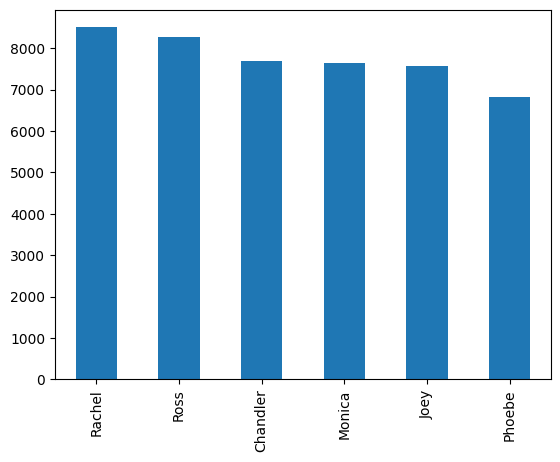

In [42]:
friends_df['character'].value_counts().plot(kind='bar')

**Your answer:** As we can see all 6 characters have similar number of lines. Rachel and Ross have the most by a slight margin and Phoebe has the fewest.

#### **a(iii)**  
Create a corpus named `corpus` such that each document in the corpus corresponds to exactly one row's "line" in `friends_df`.

In [43]:
corpus = list(friends_df['line'])

#### **a(iv)**  
Write a function called `my_preprocessor` which, given a string, returns another string after tokenization, stopword removal and lemmatization have been applied. The remaining terms (tokens after stopword removal and lemmatization has been applied) should be joined in the same string using space ' '.

In [44]:
import nltk

# for tokenization and punctuation removal 
from nltk.tokenize import RegexpTokenizer

# to filter out stop words
nltk.download("stopwords")
from nltk.corpus import stopwords

# for lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4') # omw=open multilingual wordnet

tokenizer = nltk.RegexpTokenizer(r"\w+")
stop_list = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

def my_preprocessor(sentence):
    tokenized = tokenizer.tokenize(sentence)
    filtered = [word.lower() for word in tokenized if word.lower() not in stop_list]
    lemmatized = [lemmatizer.lemmatize(word) for word in filtered]
    return ' '.join(lemmatized)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marcl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\marcl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\marcl\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


#### **a(v)**   
You must apply your preprocessor `my_preprocessor` on each line contained in the `corpus`. Create a preprocessed corpus named `corpus_p` which contains the same lines as `corpus` after the preprocessor `my_preprocessor` has been applied.

In [45]:
corpus_p = list(map(my_preprocessor, corpus))

#### **a(vi)**   
Split the `friends_df` dataset from the previous task into training (80%) and test (20%) data preserving the distribution based on the "character" value. 

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(friends_df['line'], friends_df['character'], test_size=0.2, stratify=friends_df['character'])

#### **a(vii)**   
Similar to **a(iii)**, for the training data and the test data, create two corpora named `corpus_train` and `corpus_test` respectively. Each document in the training (test) corpus must correspond to exactly one row's "line" value in the corresponding training (test) dataframe.

In [47]:
corpus_train = list(X_train)
corpus_test = list(X_test)

### b) Set of Words (4.5 pts)

#### **b(i)**  
We want to encode our text in such a way that for each word in the vocabulary, we are only interested in whether the word appears or not in a given document. Create such a Set of Words encoding for the whole corpus `corpus`. Use the previously defined preprocessor `my_preprocessor` as preprocessor.

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

sow = CountVectorizer(preprocessor=my_preprocessor, binary=True)
_ = sow.fit(corpus)

#### **b(ii)**  
Pick one (any) of the lines of the "line" column in the `friends_df` dataset. Display the line in:
    1) its original form, 
    2) its preprocessed version (the result contained in `corpus_p` after applying `my_preprocessor`), and 
    3) its encoding computed by the Set of Words method. This can be either an array (a vector) or a scipy matrix. 
Briefly comment on the Set of Words encoding.

In [64]:
line = friends_df['line'][0]
print(f"Original line: {line}")
p_line = my_preprocessor(line)
print(f"Preprocessed line: {p_line}")
sow_enc = sow.transform([p_line])
print(f"Encoded by Set of Words: {sow_enc}")
sow_enc_array = sow_enc.toarray()
print(f"Encoded by Set of Words in array form: {sow_enc_array}")

Original line:  There's nothing to tell! He's just some guy I work with!
Preprocessed line: nothing tell guy work
Encoded by Set of Words:   (0, 4437)	1
  (0, 6824)	1
  (0, 10015)	1
  (0, 11219)	1
Encoded by Set of Words in array form: [[0 0 0 ... 0 0 0]]


**Your answer:** As we can see by the encoding of the set of words the four words "nothing", "tell", "guy" and "work" are encoded as the 4437th, 6824th, 10015th and 11219th word of the vocabulary of the set of words. The array print is not very useful in this case because the matrix is extremely sparse.

#### **b(iii)**  
Create a Set of Words encoding based only on the documents in `corpus_train`. Use the previously defined preprocessor `my_preprocessor` as a preprocessor.

In [65]:
sow_train = CountVectorizer(binary=True, preprocessor=my_preprocessor)
_ = sow_train.fit(corpus_train)

#### **b(iv)**  
In this task, we will use an SGD (Stochastic Gradient Descend) classifier to predict the character given a line from the corpus. Train the classifier on the Set of Words encoding of training corpus `corpus_train` using the character as the target feature and 'log_loss' as the loss function. Apply the classifier on the Set of Words encodings of both the training corpus and the test corpus `corpus_train`. Show its accuracy for both the training corpus and the test corpus.

In [66]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
sgd = SGDClassifier(loss='log_loss')
sgd.fit(sow_train.transform(corpus_train), y_train)
y_pred_train = sgd.predict(sow_train.transform(corpus_train))
print(f"Accuracy Train: {accuracy_score(y_train, y_pred_train)}")
y_pred_test = sgd.predict(sow_train.transform(corpus_test))
print(f"Accuracy Test: {accuracy_score(y_test, y_pred_test)}")

Accuracy Train: 0.41710784445459675
Accuracy Test: 0.2968934752230463


#### **b(v)**  
Briefly comment on the accuracy of the classifier compared to the expected accuracy of a random guesser (here: a model that simply guesses each character according to a distribution based on the line count). Use the line count distribution shown in **a(ii)** to reason about the approximate accuracy of the random guesser.

**Your answer:** Given that the distribution of lines by characters is pretty uniform and there are 6 characters we can expect an accuracy of $1 / 6 = 0.1667$ from a random guesser. Therefore our classifier is significantely better with a test accuracy of nearly $30$. 

#### **b(vi)**  
Pick two lines from the dataset `friends_df`. Predict their character by applying the SGD classifier from **b(iv)** to their Set of Words encodings. Show the original lines, their original characters and the predicted characters.

In [68]:
pred_1 = sgd.predict(sow_train.transform([friends_df['line'][0]]))[0]
pred_2 = sgd.predict(sow_train.transform([friends_df['line'][1]]))[0]

print(f"The line \"{friends_df['line'][0]}\" originally from {friends_df['character'][0]} was predicted to be from {pred_1}")
print(f"The line \"{friends_df['line'][1]}\" originally from {friends_df['character'][1]} was predicted to be from {pred_2}")

The line " There's nothing to tell! He's just some guy I work with!" originally from Monica was predicted to be from Monica
The line " C'mon  you're going out with the guy! There's gotta be something wrong with him!" originally from Joey was predicted to be from Rachel


### c) Doc2Vec (1.5 pts)

#### **c(i)**  
In this part, we want to encode the lines using Doc2Vec. Create a Doc2Vec embedding based on the documents in the preprocessed corpus `corpus_p`. Set the vector dimension to 10 and min_count to 3.

In [72]:
docs = [TaggedDocument(doc, [i]) for i, doc in enumerate(corpus_p)]

import multiprocessing
cores = multiprocessing.cpu_count()

doc2vec = Doc2Vec(vector_size=10, min_count=3, workers=cores)
doc2vec.build_vocab(docs)


doc2vec.train(corpus_iterable=docs, total_examples=doc2vec.corpus_count, epochs=20)

#### **c(ii)**  
Pick one (any) line from the dataset `friends_df`. Display the line and the character saying it. Find its most similar line w.r.t. the Doc2Vec encoding and display the original line and its corresponding character. Do the lines belong to the same character?

In [78]:
d1= corpus_p[0]
d1_tokens = tokenizer.tokenize(d1)
d1_embedding = doc2vec.infer_vector(d1_tokens)
most_similar_docs = doc2vec.dv.most_similar(d1_embedding)
tag = most_similar_docs[0][0]
print(f"Original line: {friends_df['line'][0]} by {friends_df['character'][0]}")
print(f"Most similar line: {friends_df['line'][tag]} by {friends_df['character'][tag]}")

Original line:  There's nothing to tell! He's just some guy I work with! by Monica
Most similar line:  Life-sized Imperial Storm Troopers from Sharper Image? by Chandler


**Your answer:** They do not correspond to the same character. But a sample size of 1 is not enough to make an educated guess about the overall performance of this model

### d) Language model using N-grams (2 pts)

#### For the following tasks, use the `friends_df` data.

#### **d(i)**  
For each character, create a corresponding corpus. Each corpus must be a list of documents. Each document corresponds to one "line" value of that character and it should be a list of terms. You must obtain this list of terms after applying preprocessing steps such as to lowercase, no punctuation, and tokenization to the original line. Do not perform stemming/lemmatization and/or stopword removal for this task.
Display the corpus of one of the characters.

In [80]:
import string

def preprocessing(s):
    s = s.lower()
    s = ''.join(c if c not in string.punctuation else '' for c in s)
    return tokenizer.tokenize(s)

corpus_chars = {}
for c in friends_df['character'].unique():
    lines = list(friends_df[friends_df['character'] == c]['line'].apply(preprocessing))
    corpus_chars[c] = lines

#### **d(ii)**  
For each character separately, build a trigram language model using MLE. Use both right and left padding and learn each language model using the character's corpus from **d(ii)**.

In [82]:
from nltk.lm import MLE

trigrams = {}
for c in corpus_chars:
    padded_tuples, vocab = padded_everygram_pipeline(3, corpus_chars[c])
    lm_trigram = MLE(3)
    lm_trigram.fit(padded_tuples, vocab)
    trigrams[c] = lm_trigram

#### **d(iv)**  
For each character, use the created trigram language model to generate a sentence of ten words. Display the sentences.

In [87]:
for c in trigrams:
    print(f"{c} says: {' '.join(trigrams[c].generate(10))}")

Monica says: receiving </s> </s> </s> </s> </s> </s> </s> </s> </s>
Joey says: yeah ill see you later </s> </s> </s> </s> </s>
Chandler says: </s> </s> </s> </s> </s> </s> </s> </s> </s> </s>
Phoebe says: <s> done oh good there you go </s> </s> </s>
Ross says: course of course not it s not make a pyramid
Rachel says: please you do that </s> </s> </s> </s> </s> </s>


## Question 5: Process Mining (22pts)

In [ ]:
import pandas as pd
import pm4py

In [ ]:
from pm4py.statistics.traces.generic.log import case_statistics

In [ ]:
from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay

In [ ]:
import matplotlib.pyplot as plt

### a) Loading the Data and Basic Statistics (9pts)

#### **a(i)** 
Load the data **reimburse.csv** and create a PM4Py event log. In doing so, use the following column mapping:
 - *Activity* is the activity key
 - *Case* is the case ID
 - *Timestamp* is the timestamp

In [ ]:
# your code

#### **a(ii)** 
Compute and print the following basic information:
- Number of events
- Number of cases
- Earliest timestamp
- Latest timestamp
- Number of trace variants

In [ ]:
# your code

#### **a(iii)** 
In process mining, multiple events that have the same timestamp can cause problems because the ordering of events (or even activities) becomes unclear. Moreover, they can indicate batching (i.e., one activity is executed for multiple cases simultaneously). Therefore, during your analysis, it is good to keep that in mind. To this end, compute the following statistics/answer the following questions:

1. How many events occur almost at the same time (i.e., within less than 100ms as the preceding event. (Proceeding event in the *entire* event log)?
2. Are there resources that complete two activities at the same time (within less than 100ms)?
3. How many cases are there in which two activities are executed at the same time (i.e., two events that belong to the same case occur within less than 100ms)?

*Hint: Depending on how you find the answers, be careful about event orderings.*

In [ ]:
# your code

#### **a(iv)** 
Provide a plot that shows the number of running cases (i.e., cases that have started but not yet finished) over time. You may assume that the log only contains complete traces. For each case that has started, its completion is the last observed event associated with that case. In case multiple cases start or end at the same time, you also generate multiple values.

In [ ]:
# your code

**Your answer**: *(Briefly describe the differences between the two models in about five sentences here.)*

### b) Discovery and Conformance Checking (9pts)

#### **b(i)** 
Mine a Petri net using Inductive Miner and display it.

In [ ]:
# your code

#### **b(ii)** 
Compute the fitness of the discovered Petri net using token-based replay.

*Hint: PM4Py can directly (using the top-level API) compute the number of missing, remaining, consumed, and produced tokens. Based on these, you can, for example, compute the token-based replay fitness.*

In [ ]:
# your code

#### **b(iii)** 
Filter the log to contain only traces where *Register Low* occurs. How many traces does the resulting log `log_low` contain?


In [ ]:
# your code

#### **b(iv)** 
Discover a Petri net for `log_low` and compute its fitness. How does this model differ from the model you discovered in *b(i)*? 

Suppose each of your produced process models is considered a 2-class classifier: provided a trace, it returns "Yes" if and only if the trace can be replayed by the model. Based on this perspective, how would the two process models compare in terms of precision?

In [ ]:
# your code

**Your answer:** *(Briefly describe the difference between the two models here. About two sentences can be enough.*)

**Your answer**: *(Relate your observations to precision here.)*

### Conformance Diagnostics De-jure Model
The process owner provides you a de-jure model (i.e., a model of the should-be process) and a slightly changed version of the so far considered event log. 

In this task, you will again apply conformance checking by means of token-based replay to provide diagnostics on deviations.

#### **b(v)** 
Load the Petri net *pn_conf.apnml*, the event log *log_conf.xes*, and provide the overall (i.e., model-based) token-based replay fitness score.



In [ ]:
# your code

#### **b(vi)** 
To provide additional diagnostics on the deviations, compute the missing, consumed, produced and remaining number of tokens for **each place**. 
To do so, use the following *pm4py* code:
    
    from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay
	tbr_results, place_fitness, transition_fitness, notexisting_activities_in_model =
    token_based_replay.apply(log_conf, net_conf, im_conf, fm_conf, parameters={"enable_pltr_fitness": True, "disable_variants": True})

After running this line for log `log_conf`, Petri net `net_conf` with initial marking `im_conf` and final marking `fm_conf`, the variable `place_fitness` will contain the token counts for each place and trace. Therefore, you will only need aggregate over the traces.
Print a table of the token counts per place. 


In [ ]:
# your code

#### **b(vii)** 
Consider the token counts per place and a few unfitting traces, which deviation(s) do you observe? Describe the deviation and briefly explain how it can be related to the token counts of the individual places. For example, activity *xy* is often missing resulting in a high number of missing tokens in place *p*.  


In [ ]:
# your code

**Your answer:** *(Describe the deviation(s). One sentence can already be enough.)*

**Your answer:** (*Relate the deviation(s) to the token counts of the individual places. Roughly five sentences can be enough for a precise description.*)

### c) Analyzing Fraud (4pts)

#### **c(i)** 
Filter the event log so that it only contains traces where a fraud report is filled (occurrence of `Fill Fraud Report`). For theses traces, create a bar plot showing the number of products of a certain brand involved in the fraud. Describe the resulting plot.

*Hint: Each case is associated with precisely one brand.*


In [ ]:
# your code

**Your answer:** (*Describe the plot in two to three sentences.*)

#### **c(ii)**  
The plot shows differences between brands. Discuss the result. Consider what you learned in Lecture 11 (association rules). Try to provide additional analysis results to underpin your discussion.

*Hint: A very short additional analysis (i.e., a few lines of code) might already be sufficient.*


In [ ]:
# your code (for a short additional analysis)

**Your answer:** *(Relate your results to Lecture 11, approximately one short paragraph)*

## Question 6 - Simpson's Paradox (3 pts)

### Sex Bias in Berkeley Graduate Admissions?

In the Fall of 1973, the University of California at Berkeley released data about their graduate class. The data showed the major the applicant applied to, their self-reported gender (Male or Female), and whether or not they were accepted or rejected. The acceptance rates between men and women were different. This caused immediate concern in the public as people thought that Berkeley was biased against women.

The "Berkeley Dataset" contains all 12,763 applicants to UC-Berkeley's graduate programs in Fall 1973. This dataset was published by UC-Berkeley researchers in an analysis to understand the possible gender bias in admissions.

Dataset Variables:

Year : number ➜ The application year (this value is always 1973)

Major : string ➜: An anonymized major code (either A, B, C, D, E, F, or Other). The specific majors are unknown except that A-F are the six majors with the most applicants in Fall 1973

Gender : string ➜ Applicant self-reported gender (either M or F)

Admission: string ➜ Admission decision (either Rejected or Accepted)

**a)**
Upload the data from the `berkeley.csv` file and load it into a dataframe named `data`. Display the first few lines from the dataframe.

In [ ]:
# your code

**b)** Remove the "Year" column as it does not contain any information in this dataset (all years are 1973.)

In [ ]:
# your code

**c)** For each of the values of column "Gender", compute the admission rate and compare them against each other.

In [ ]:
# your code

**Your answer:**

**d)** For each value combination of the "Gender" and "Major" columns, compute the admission rate. Compare the admission rate of women against the admission rate of men for each of the majors.

In [ ]:
# your code

**Your answer:**

**e)** Can you confirm there is a sex bias in the admission rates of the students?

**Your answer:**

## Question 7: Big Data (15pts)

In [ ]:
import pandas as pd

You are a data scientist at NASA, an agency for civil space programs, and with your team you develop and maintain the software of the NASA Crew Exploration Vehicle (CEV).  Your task is to analyze the performance of the software, and as a first exploratory step, you would like to **compute the mean execution times** of function calls within that software. Since the running vehicle will generate a high throughput of observable events in a stream, you decide to set up a MapReduce pipeline in Hadoop. 

The file **nasa-cev-software-tests.tsv** records timestamped events of the vehicle's software tests. The log contains the columns *Case*, *Activity* and *Timestamp*, denoting the case ID, the activity key (method call) and timestamp of the event record in nanoseconds, respectively. Furthermore, the log contains the columns *Lifecycle Transition* and *Execution ID*. The lifecycle transition takes either of the values *start* and *complete*, stating whether the corresponding activity (method call) in that row is being started or completed at the specified timestamp. The execution ID relates each event to a concrete method call, i.e., for each execution ID, there are exactly two entries (namely a *start* and a *complete* event) in the log.

### a) Plan the Maths (2pt):

The mean $\mu_n$ over numerical values $v_1,...,v_n$ is well-known to be computed as $\mu_n = \frac{1}{n}\sum_{i=1}^{n} v_i$.\
One may also use the alternative recursive formalization $\mu_{n+m} = \frac{n\cdot\mu_{n} + m\cdot\mu_{m}}{n+m}$. \
What is the advantage of using the alternative formalization when you think of handling streaming data or distributed data? Briefly explain.


**Your answer:**

### b) Set up MapReduce (10pts)

Realize the computation of the mean execution times of activities as a MapReduce job. 
You need to implement this a cascaded MapReduced job. This means that the output of the first job will serve as the input of the second job. In the first job, derive the execution times of each activity execution, i.e. the time difference between the *complete* and the *start* lifecycle transition of each activity execution. In the second step, aggregate this timing information to compute the mean.

#### **b(i)** 
Specify the *function signatures* of the map functions and the reduce functions that you are going to use.\
I.e., find concrete sets to substitute $K_1, V_1, ... $ in the general signatures for map and reduce functions \

$ map:  K_1 \times V_1 \rightarrow (K_2 \times V_2)^* $\
$ reduce: K_2 \times (V_2)^* \rightarrow (V_3)^*$ (or a singleton $V_3$) 

*Hint: You may introduce symbols to denote sets, e.g. $Act$ for the set of activities.\
You may also first implement the solution (b(ii)) to get an idea about the underlying signatures.\
Mind that you need two map and two reduce functions.*

**Your answer:**

#### **b(ii)**: 
Specify map functions and reduce functions to compute the mean execution time per activity as python scripts.

In [ ]:
# your code (nasa_mapper1.py)

In [ ]:
# your code (nasa_reducer1.py)

In [ ]:
# your code (nasa_mapper2.py)

In [ ]:
# your code (nasa_reducer2.py)

### c) Run MapReduce (3pts)

In the following, please use one of your team members' matriculation number as an identifier.

#### **c(i) (Randomization)**: 
Before applying your functions from the previous step to the dataset, please insert the matriculation number and run the following lines to randomly filter out a few of the traces in the event log, and continue working with the filtered log. 


In [ ]:
# your matriculation number here
matr_nb = # ... #

# utility code (do not change)
import random
random.seed(matr_nb)

full_df = pd.read_csv("datasets/nasa-cev-software-tests.tsv", sep="\t")

case_ids = list(set(full_df["Case"].values))
case_ids.sort()
filtered_out_case_ids = random.sample(case_ids, 10)
filtered_case_ids = [case_id for case_id in case_ids if case_id not in filtered_out_case_ids]
randomized_df = full_df[full_df["Case"].isin(filtered_case_ids)]

randomized_df.to_csv("datasets/nasa-cev-software-tests-randomized-" + str(matr_nb) + ".tsv",
          columns=["Activity", "Timestamp", "Lifecycle Transition", "Execution ID"],
          sep="\t", index=False, header=False)

#### **c(ii)**:
Now, it is time to work with the Hadoop Distributed File System (HDFS). Follow the instructions below and show your results in each step (screenshots of the command line).

    1) Import the event log to your Docker engine (at /usr/local/hadoop/(your_matr_nb)-event-log/). You also need to import the python scripts, but only document the event log import here.
    2) Upload the files to the running HDFS (at /input/(your_matr_nb)-event-log/).
	3) Run Hadoop commands for the MapReduce computation.
    4) Show the final output (computed mean execution times).

In [ ]:
from IPython.display import Image
# your code
# Image(filename='filename_screenshot_of_a1')

In [ ]:
# your code
# Image(filename='filename_screenshot_of_a2')

In [ ]:
# your code
# Image(filename='filename_screenshot_of_a3')

In [ ]:
# your code
# Image(filename='filename_screenshot_of_a4')